<a href="https://colab.research.google.com/github/mahir21/finbert-practice-1.0/blob/main/FinbertTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install transformers
import torch
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [5]:
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-12-31'

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone', do_lower_case=False)
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')
sentiment_analyzer = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [32]:
news_headlines = [
    "Apple increase it reveune",
    "Apple gains huge profit",
    "Apple stocks price fall to 0",
]

sentiments = sentiment_analyzer(news_headlines)

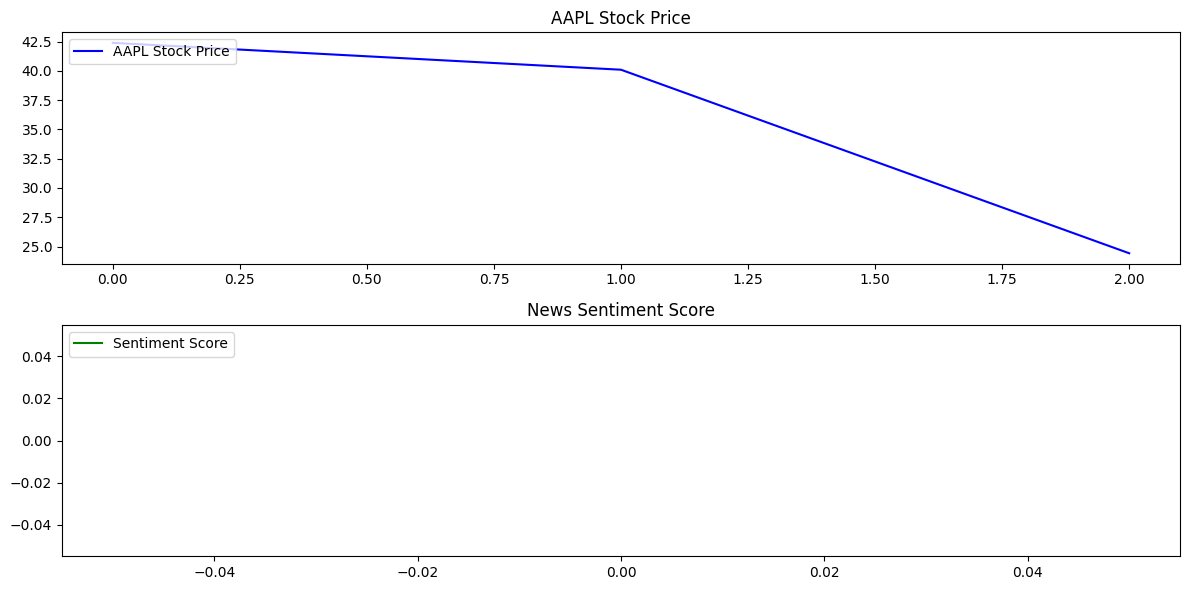

In [33]:

# Example sentiment data as a list of dictionaries (you need to provide this data)

# Initialize an empty list for sentiment scores
average_sentiments = []

# Iterate through the list of sentiments
for sentiment in sentiments:
    try:
        # Calculate the average sentiment score for each sentiment
        average_score = np.mean([s['score'] for s in sentiment])
        average_sentiments.append(average_score)
    except (TypeError, KeyError):
        # Handle cases where sentiment is not as expected
        average_sentiments.append(np.nan)  # Use NaN for missing or invalid data

# Create a placeholder DataFrame for stock_data (replace with your actual data)
stock_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=len(sentiments)),
    'Close': np.random.rand(len(sentiments)) * 100
    #'Close': [100, 105, 110],  # Replace with your actual stock prices
    #'Sentiment': average_sentiments
})

stock_data['Sentiment'] = average_sentiments


# Plot stock prices and sentiment scores
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(stock_data['Close'], label=f'{stock_symbol} Stock Price', color='b')
plt.title(f'{stock_symbol} Stock Price')
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(stock_data.index, stock_data['Sentiment'], label='Sentiment Score', color='g')
plt.title('News Sentiment Score')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
